In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [ ]:
# Load the dataset
dataset = pd.read_excel('/content/Copy of Kelompok Bersih_Cleaned(1).xlsx')

# Display the first few rows of the dataset
print(dataset.head())

   TAHUN  Konsumsi Minyak Bumi (juta ton)  Data GDP(USDollar)  \
0   1967                        5670000.0        5.667757e+09   
1   1968                        5993000.0        7.076465e+09   
2   1969                        6393000.0        8.337423e+09   
3   1970                        6790000.0        9.150685e+09   
4   1971                        7024000.0        9.333536e+09   

   Harga Minyak Bumi International (USDollar)  
0                                        6.36  
1                                        6.37  
2                                        5.82  
3                                        5.21  
4                                        6.92  


In [ ]:
# Select the specific columns and rename for simplicity
df = dataset[['TAHUN', 'Konsumsi Minyak Bumi (juta ton)', 'Data GDP(USDollar)', 'Harga Minyak Bumi International (USDollar)']]
df.columns = ['Year', 'Oil_consumption', 'GDP', 'Oil_Price']
df


,Year,Oil_consumption,GDP,Oil_Price
0,1967,5670000.00,5.667757e+09,6.36
1,1968,5993000.00,7.076465e+09,6.37
2,1969,6393000.00,8.337423e+09,5.82
3,1970,6790000.00,9.150685e+09,5.21
4,1971,7024000.00,9.333536e+09,6.92
5,1972,7580000.00,1.099759e+10,6.83
6,1973,9051000.00,1.627325e+10,9.09
7,1974,9463000.00,2.580241e+10,29.16
8,1975,10858000.00,3.046386e+10,24.96
9,1976,11716000.00,3.726916e+10,27.48


In [ ]:
# Set 'Year' as the index
df.set_index('Year', inplace=True)

# Display the first few rows of the selected columns
print(df.head())
print(df.shape)
print(df.tail())

      Oil_consumption           GDP  Oil_Price
Year                                          
1967        5670000.0  5.667757e+09       6.36
1968        5993000.0  7.076465e+09       6.37
1969        6393000.0  8.337423e+09       5.82
1970        6790000.0  9.150685e+09       5.21
1971        7024000.0  9.333536e+09       6.92
(57, 3)
      Oil_consumption           GDP  Oil_Price
Year                                          
2019      69726753.65  1.119100e+12      61.72
2020      61383367.03  1.059055e+12      42.14
2021      63841760.59  1.186505e+12      63.14
2022      69653574.91  1.319100e+12      87.95
2023      76675200.00  1.385715e+12      72.56


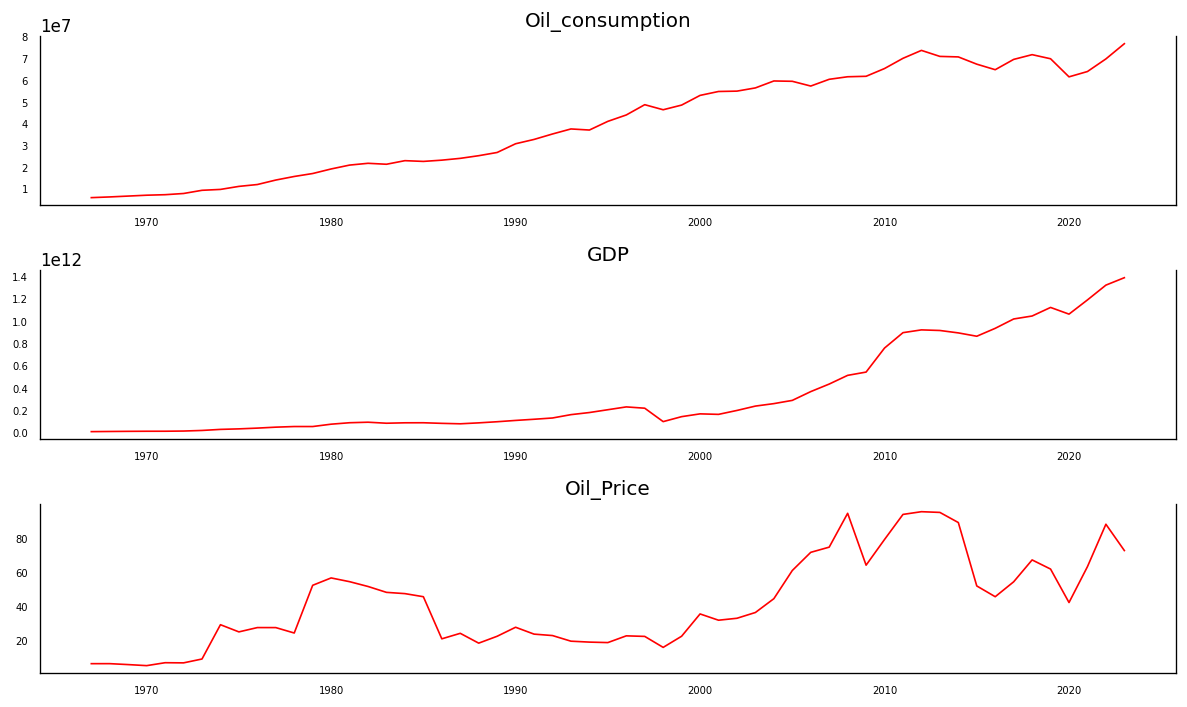

In [ ]:
# Define the number of columns in the dataframe
num_columns = df.shape[1]

# Plot and visualize
fig, axes = plt.subplots(nrows=num_columns, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)

# Rename the scaled DataFrame to df
df = df_scaled

# Display the first few rows of the scaled data
df

,Oil_consumption,GDP,Oil_Price
Year,,,
1967,-1.490410,-0.856374,-1.352718
1968,-1.476489,-0.852905,-1.352336
1969,-1.459249,-0.849799,-1.373354
1970,-1.442139,-0.847796,-1.396665
1971,-1.432053,-0.847346,-1.331318
1972,-1.408090,-0.843248,-1.334757
1973,-1.344691,-0.830256,-1.248392
1974,-1.326934,-0.806788,-0.481424
1975,-1.266811,-0.795308,-0.641926


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table
    are the P-Values. P-Values lesser than the significance level (0.05), implies
    the Null Hypothesis that the coefficients of the corresponding past values is
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


grangers_causation_matrix(df, variables = df.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print resul

,Oil_consumption_x,GDP_x,Oil_Price_x
Oil_consumption_y,1.0,0.0001,0.0036
GDP_y,0.0,1.0000,0.0101
Oil_Price_y,0.0,0.0000,1.0000


In [ ]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen


def cointegration_test(df, alpha=0.05):
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df, -1, 5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

# Perform Cointegration test
cointegration_test(df)


Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Oil_consumption ::  19.34     > 24.2761   =>   False
GDP    ::  4.52      > 12.3212   =>   False
Oil_Price ::  0.04      > 4.1296    =>   False


In [ ]:
nobs = 6
df_train, df_test = df[0:-nobs], df[-nobs:]
print(df_train.shape)  # (51, 3)
print(df_test.shape)   # (6, 3)


(51, 3)
(6, 3)


In [ ]:
# Function to perform ADFuller test
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic': round(r[0], 4), 'pvalue': round(r[1], 4), 'n_lags': round(r[2], 4), 'n_obs': r[3]}
    p_value = output['pvalue']
    def adjust(val, length=6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key, val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

# ADF Test on each time series column
for name, column in df_train.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Oil_consumption" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.1655
 No. Lags Chosen       = 0
 Critical value 1%     = -3.568
 Critical value 5%     = -2.921
 Critical value 10%    = -2.599
 => P-Value = 0.9425. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.2145
 No. Lags Chosen       = 1
 Critical value 1%     = -3.571
 Critical value 5%     = -2.923
 Critical value 10%    = -2.599
 => P-Value = 0.9961. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil_Price" 
    -----------------------------------------------
 Null Hypothesis: Da

In [ ]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [ ]:
# ADF Test on each column of 1st Differenced Dataframe
print("ADF Test on differenced data:")
for name, column in df_differenced.items():
    adfuller_test(column, name=column.name)
    print('\n')

ADF Test on differenced data:
    Augmented Dickey-Fuller Test on "Oil_consumption" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.9837
 No. Lags Chosen       = 0
 Critical value 1%     = -3.571
 Critical value 5%     = -2.923
 Critical value 10%    = -2.599
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.56
 No. Lags Chosen       = 11
 Critical value 1%     = -3.616
 Critical value 5%     = -2.941
 Critical value 10%    = -2.609
 => P-Value = 0.1015. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil_Price" 
    -----------------------------------------------
 Null Hypothesi

In [ ]:
# 2rd difference
df_differenced_2nd = df_differenced.diff().dropna()

# ADF Test on each column of 3rd Differenced Dataframe
print("ADF Test on third differenced data:")
for name, column in df_differenced_2nd.items():
    adfuller_test(column, name=column.name)
    print('\n')

ADF Test on third differenced data:
    Augmented Dickey-Fuller Test on "Oil_consumption" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.1261
 No. Lags Chosen       = 5
 Critical value 1%     = -3.593
 Critical value 5%     = -2.932
 Critical value 10%    = -2.604
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.869
 No. Lags Chosen       = 11
 Critical value 1%     = -3.621
 Critical value 5%     = -2.944
 Critical value 10%    = -2.61
 => P-Value = 0.3468. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil_Price" 
    -----------------------------------------------
 Null Hyp

In [ ]:
# 3rd difference (if needed)
df_differenced_3rd = df_differenced_2nd.diff().dropna()

# ADF Test on each column of 3rd Differenced Dataframe
print("ADF Test on third differenced data:")
for name, column in df_differenced_3rd.items():
    adfuller_test(column, name=column.name)
    print('\n')

ADF Test on third differenced data:
    Augmented Dickey-Fuller Test on "Oil_consumption" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.6439
 No. Lags Chosen       = 9
 Critical value 1%     = -3.616
 Critical value 5%     = -2.941
 Critical value 10%    = -2.609
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.845
 No. Lags Chosen       = 9
 Critical value 1%     = -3.616
 Critical value 5%     = -2.941
 Critical value 10%    = -2.609
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Oil_Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit

In [ ]:
model = VAR(df_differenced_3rd)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -8.381481541057227
BIC :  -7.909103429982318
FPE :  0.00022935413959473115
HQIC:  -8.203722484544214 

Lag Order = 2
AIC :  -9.352905693733506
BIC :  -8.518091143162398
FPE :  8.733507767202542e-05
HQIC:  -9.040179159671133 

Lag Order = 3
AIC :  -9.176981160764361
BIC :  -7.972539500917482
FPE :  0.00010575778530222258
HQIC:  -8.727977403029804 

Lag Order = 4
AIC :  -9.207700152466398
BIC :  -7.626259340584303
FPE :  0.00010587671199634968
HQIC:  -8.621225660665246 

Lag Order = 5
AIC :  -9.915778898169348
BIC :  -7.949788071348627
FPE :  5.527248654927157e-05
HQIC:  -9.190782240650021 

Lag Order = 6
AIC :  -10.011540398101054
BIC :  -7.653274487573625
FPE :  5.5468949199743834e-05
HQIC:  -9.147142671015162 

Lag Order = 7
AIC :  -9.989286740766808
BIC :  -7.2308536577793845
FPE :  6.687323843770401e-05
HQIC:  -8.98481749760512 

Lag Order = 8
AIC :  -10.065878147520586
BIC :  -6.899229171056955
FPE :  8.134046496882239e-05
HQIC:  -8.920917868908447 

Lag Order 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# An alternate method to choose the order(p) of the VAR models is to use
# the model.select_order(maxlags) method. The selected order(p) is the
# order that gives the lowest ‘AIC’, ‘BIC’, ‘FPE’ and ‘HQIC’ scores.
x = model.select_order(maxlags=5)
x.summary()

,AIC,BIC,FPE,HQIC
0,-6.706,-6.584,0.001223,-6.661
1,-8.103,-7.612,0.0003031,-7.922
2,-9.138,-8.278*,0.0001084,-8.821
3,-9.029,-7.801,0.0001230,-8.576
4,-9.150,-7.552,0.0001127,-8.560
5,-9.916*,-7.950,5.527e-05*,-9.191*


In [ ]:
import pandas as pd

# Nilai AIC, BIC, FPE, dan HQIC untuk setiap model
results = {
    'Lag': [0, 1, 2, 3, 4, 5],
    'AIC': [-6.706, -8.103, -9.138, -9.029, -9.150, -9.916],
    'BIC': [-6.584, -7.612, -8.278, -7.801, -7.552, -7.950],
    'FPE': [0.001223, 0.0003031, 0.0001084	, 0.0001230, 0.0001127, 0.00005527],
    'HQIC': [-6.661, -7.922, -8.821, -8.576, -8.560, -9.191]
}

df_results = pd.DataFrame(results)

# Menentukan model dengan nilai minimum untuk setiap kriteria
best_aic = df_results.loc[df_results['AIC'].idxmin()]
best_bic = df_results.loc[df_results['BIC'].idxmin()]
best_fpe = df_results.loc[df_results['FPE'].idxmin()]
best_hqic = df_results.loc[df_results['HQIC'].idxmin()]

print("Best model based on AIC:")
print(best_aic)
print("\nBest model based on BIC:")
print(best_bic)
print("\nBest model based on FPE:")
print(best_fpe)
print("\nBest model based on HQIC:")
print(best_hqic)

Best model based on AIC:
Lag     5.000000
AIC    -9.916000
BIC    -7.950000
FPE     0.000055
HQIC   -9.191000
Name: 5, dtype: float64

Best model based on BIC:
Lag     2.000000
AIC    -9.138000
BIC    -8.278000
FPE     0.000108
HQIC   -8.821000
Name: 2, dtype: float64

Best model based on FPE:
Lag     5.000000
AIC    -9.916000
BIC    -7.950000
FPE     0.000055
HQIC   -9.191000
Name: 5, dtype: float64

Best model based on HQIC:
Lag     5.000000
AIC    -9.916000
BIC    -7.950000
FPE     0.000055
HQIC   -9.191000
Name: 5, dtype: float64


In [ ]:
# Menampilkan hasil dalam bentuk tabel
summary = pd.DataFrame({
    'Criteria': ['AIC', 'BIC', 'FPE', 'HQIC'],
    'Lag': [best_aic['Lag'], best_bic['Lag'], best_fpe['Lag'], best_hqic['Lag']],
    'Value': [best_aic['AIC'], best_bic['BIC'], best_fpe['FPE'], best_hqic['HQIC']]
})

print("\nSummary of best models based on different criteria:")
print(summary)


Summary of best models based on different criteria:
  Criteria  Lag     Value
0      AIC  5.0 -9.916000
1      BIC  2.0 -8.278000
2      FPE  5.0  0.000055
3     HQIC  5.0 -9.191000


In [ ]:
model_fitted = model.fit(5)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 26, Jun, 2024
Time:                     12:35:37
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -7.94979
Nobs:                     43.0000    HQIC:                  -9.19078
Log likelihood:           78.1462    FPE:                5.52725e-05
AIC:                     -9.91578    Det(Omega_mle):     2.13973e-05
--------------------------------------------------------------------
Results for equation Oil_consumption
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.000418         0.015931            0.026           0.979
L1.Oil_consumption        -1.759973         0.231033           -7.618           0.000
L1.GDP                     0.5

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

Oil_consumption : 1.99
GDP : 2.41
Oil_Price : 2.13


In [ ]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

5


array([[-0.1194175 , -0.01316513, -0.01605015],
       [-0.01006164, -0.05346405, -0.22661288],
       [-0.14431053, -0.07378427, -1.41776353],
       [-0.11007126,  0.17490984, -0.2407523 ],
       [ 0.20471306,  0.20623128,  0.3336139 ]])

In [ ]:
# Number of years to forecast
years_to_forecast = 2045 - 2024 + 1  # From 2024 to 2045 inclusive

In [ ]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Oil_consumption_2d,GDP_2d,Oil_Price_2d
Year,,,
2018,0.305957,0.184170,1.991653
2019,-0.235739,-0.463838,-0.799136
2020,-0.174228,-0.076496,-0.698220
2021,-0.005469,0.055538,-0.280055
2022,0.118995,0.084505,-0.184118
2023,-0.028073,0.138005,0.216358


In [ ]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=years_to_forecast)
future_years = pd.date_range(start='2024', periods=years_to_forecast, freq='Y').year
df_forecast = pd.DataFrame(fc, index=future_years, columns=df.columns + '_2d')

# Invert transformation to get the forecast back to original scale
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_results = invert_transformation(df_train, df_forecast, second_diff=True)

# Display the forecast results
print(df_results.loc[:, ['Oil_consumption_forecast', 'GDP_forecast', 'Oil_Price_forecast']])


      Oil_consumption_forecast  GDP_forecast  Oil_Price_forecast
2024                  1.768201      2.021250            2.803413
2025                  2.043132      1.947814            4.329544
2026                  2.143835      1.797882            5.157456
2027                  2.239069      1.703488            5.705313
2028                  2.453298      1.693599            6.069051
2029                  2.639454      1.821715            6.649148
2030                  2.911451      2.141948            8.482880
2031                  3.291794      2.196014            9.833106
2032                  3.469488      2.026286           11.009128
2033                  3.546613      1.835552           11.277674
2034                  3.655331      1.889591           11.668501
2035                  3.920183      2.098777           12.677083
2036                  4.257210      2.280121           14.211224
2037                  4.500950      2.292196           15.357273
2038                  4.6

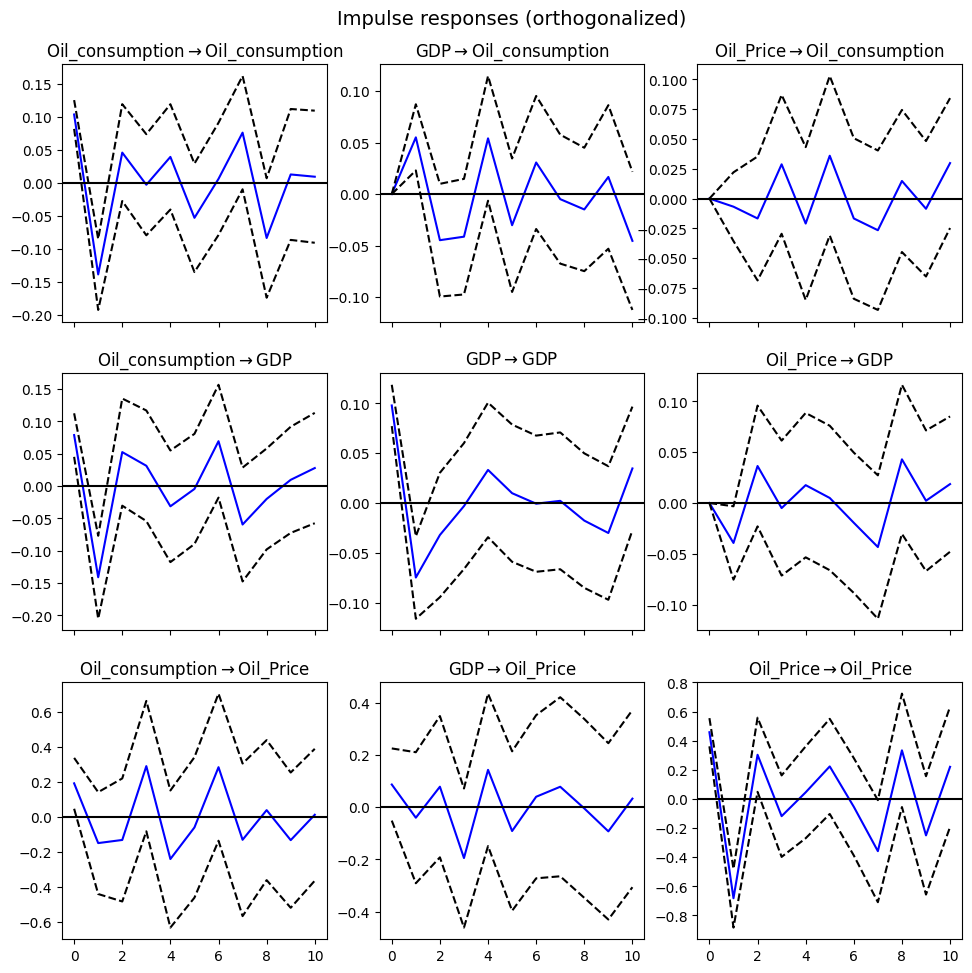

In [ ]:
# Impulse Response Function (IRF) Plot
irf = model_fitted.irf(10)
irf.plot(orth=True)
plt.show()